In [1]:
# 导入库
import os
import time

import numpy as np
import pandas as pd

In [2]:
os.chdir(r'C:\百度云同步盘\小鸡理财\每日数据\派券')

In [3]:
# 导入待派券名单
with pd.ExcelFile(r'C:\百度云同步盘\小鸡理财\每日数据\派券\2月派券.xlsx') as xlsx:
    df_quaned = pd.read_excel(xlsx,'已派券')

In [4]:
df_quaned['使用情况'] = df_quaned['使用状态'].replace('投标冻结','已使用')

In [5]:
gp_use_rate = df_quaned.groupby(by=['利息率','使用情况']).agg({'会员名':np.size,'冻结的匹配金额':np.sum}).unstack().fillna(0)

In [6]:
gp_use_rate[0,'合计发放(张)'] = gp_use_rate['会员名'].sum(axis=1)

In [7]:
gp_use_rate[0,'使用率%'] = round(gp_use_rate[('会员名','已使用')] / gp_use_rate[(0,'合计发放(张)')] * 100,2)

In [8]:
gp_use_rate[0,'投资金额'] = round(gp_use_rate[('冻结的匹配金额','已使用')],0)

In [9]:
gp_use_rate[0,'单张投资金额'] = round(gp_use_rate[('冻结的匹配金额','已使用')] / gp_use_rate[('会员名','已使用')],2)

In [10]:
gp_use_rate.drop(columns=('冻结的匹配金额'),inplace=True)

In [21]:
gp_use_rate.columns = gp_use_rate.columns.droplevel()

In [24]:
gp_use_rate.reset_index(inplace=True)

In [25]:
gp_use_rate

使用情况,利息率,已使用,未使用,合计发放(张),使用率%,投资金额,单张投资金额
0,0.5,9.0,91.0,100.0,9.00,101100.0,11233.33
1,1.0,5.0,95.0,100.0,5.00,41900.0,8380.00
2,1.2,0.0,191.0,191.0,0.00,0.0,NaN
3,1.3,1.0,190.0,191.0,0.52,1000.0,1000.00


AxesSubplot(0.125,0.125;0.775x0.755)


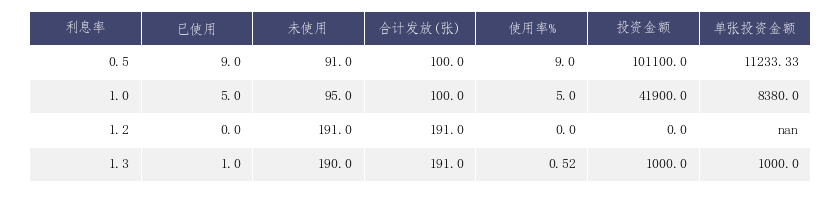

In [26]:
import matplotlib.pyplot as plt
import six

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

print(render_mpl_table(gp_use_rate, header_columns=0, col_width=2.0))